<a href="https://colab.research.google.com/github/sheikh495/MachineLearning/blob/main/Project_1_Naive_Bayesian_Classifier_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#COSC 522 UTK
#Project 1
#Student Name: Sheikh Uddin

In [ ]:
#load in data
import pandas as pd

url = 'https://gist.github.com/rhema/3b4b729d98978b9020d85c9b9e7c9dd6/raw/e0831e96129b2a0af0c696efe132cb8503c1e631/NormalWaterFlyingPokemon.csv'
all_data = pd.read_csv(url)

In [ ]:
print(all_data.tail())
print(len(all_data))

           Name    HP Attack Defense    Type
292  Butterfree  High    Low     Low  Flying
293     Spearow   Low    Low     Low  Normal
294    Delibird   Low    Low     Low  Flying
295  Feraligatr   Mid    Mid     Mid   Water
296    Bunnelby   Low    Low     Low  Normal
297


In [ ]:
train_data = all_data.iloc[:275,:]
test_data = all_data.iloc[275:,:]
print(len(test_data))

22


In [ ]:
print("Training Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

Training Data:
         Name    HP Attack Defense    Type
0    Vigoroth   Mid   High     Mid  Normal
1      Dodrio  High    Mid    High  Normal
2  Farfetch'd   Low   High     Low  Normal
3    Lillipup   Low    Low     Low  Normal
4   Jellicent   Mid    Low    High   Water

Test Data:
          Name    HP Attack Defense    Type
275  Pidgeotto  High    Low     Low  Normal
276      Zubat   Low    Low     Low  Flying
277  Igglybuff   Mid    Low     Low  Normal
278    Watchog  High   High    High  Normal
279     Pyroar   Mid   High    High  Normal


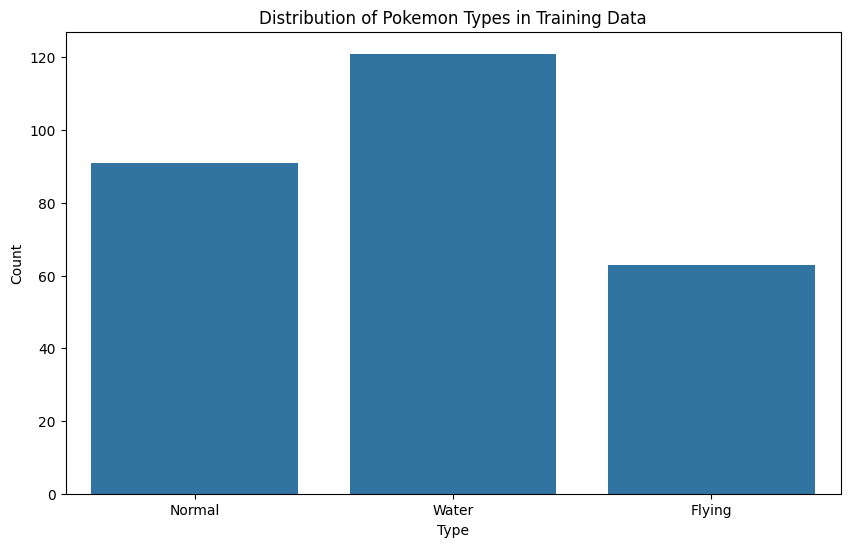

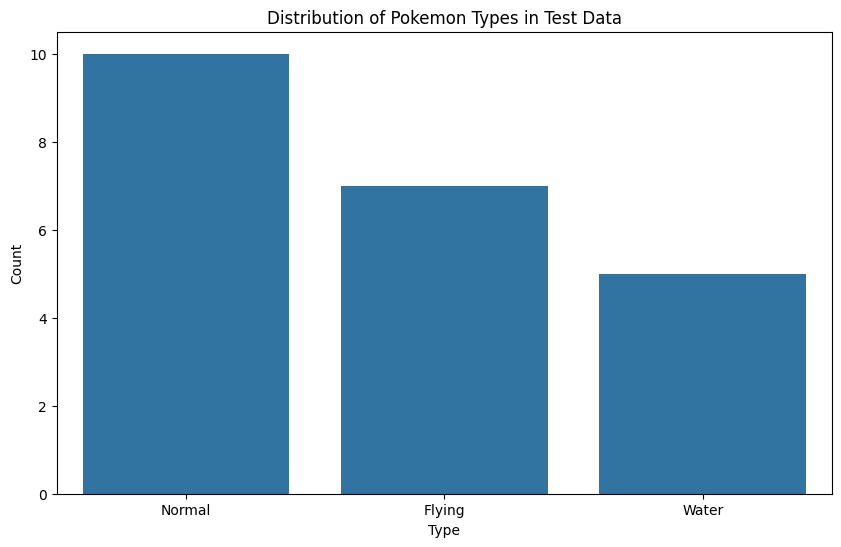

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize training data
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=train_data)
plt.title('Distribution of Pokemon Types in Training Data')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Visualize test data
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=test_data)
plt.title('Distribution of Pokemon Types in Test Data')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


In [ ]:
## Code for buildling the classifier
## Train only with the "train_data"

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load the data
url = 'https://gist.github.com/rhema/3b4b729d98978b9020d85c9b9e7c9dd6/raw/e0831e96129b2a0af0c696efe132cb8503c1e631/NormalWaterFlyingPokemon.csv'
all_data = pd.read_csv(url)

# Separate train and test data
train_data = all_data.iloc[:275, :]
test_data = all_data.iloc[275:, :]

# Separate features (X) and target variable (y) for training data
X_train = train_data.drop(columns=['Type'])  # Features
y_train = train_data['Type']  # Target variable

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode categorical features in X_train if needed
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        X_train[column] = label_encoder.fit_transform(X_train[column])

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

Accuracy: 0.4


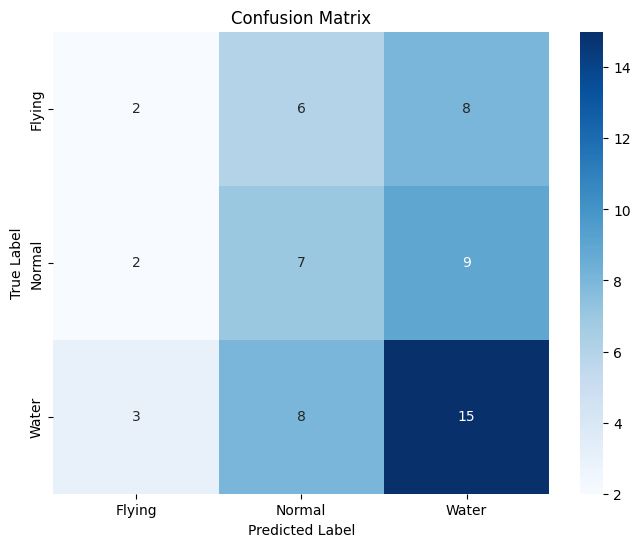

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Load the data
url = 'https://gist.github.com/rhema/3b4b729d98978b9020d85c9b9e7c9dd6/raw/e0831e96129b2a0af0c696efe132cb8503c1e631/NormalWaterFlyingPokemon.csv'
all_data = pd.read_csv(url)

# Separate features (X) and target variable (y)
X = all_data.drop(columns=['Type'])
y = all_data['Type']

# One-hot encode categorical features
onehot_encoder = OneHotEncoder()
X_encoded = pd.DataFrame(onehot_encoder.fit_transform(X[['Name', 'HP', 'Attack', 'Defense']]).toarray(), columns=onehot_encoder.get_feature_names_out(['Name', 'HP', 'Attack', 'Defense']))
X_encoded = pd.concat([X_encoded, X.drop(columns=['Name', 'HP', 'Attack', 'Defense'])], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data
url = 'https://gist.github.com/rhema/3b4b729d98978b9020d85c9b9e7c9dd6/raw/e0831e96129b2a0af0c696efe132cb8503c1e631/NormalWaterFlyingPokemon.csv'
all_data = pd.read_csv(url)

# Separate features (X) and target variable (y)
X = all_data.drop(columns=['Type'])  # Features
y = all_data['Type']  # Target variable

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode the target variable
y_encoded = label_encoder.fit_transform(y)

# Encode categorical features in X
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Optionally, evaluate the model
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)


Accuracy on the test set: 0.48333333333333334


In [ ]:
# Return probability and the class
def predict(row):
    # Predict class probabilities
    class_probabilities = rf_classifier.predict_proba([row])[0]

    # Get the predicted class index
    predicted_class_index = rf_classifier.predict([row])[0]

    # Map class index to class label
    class_labels = {0: "Normal", 1: "Water", 2: "Flying"}
    predicted_class_label = class_labels[predicted_class_index]

    # Return probability and the class
    return {"probability": class_probabilities, "class": predicted_class_label}


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data
url = 'https://gist.github.com/rhema/3b4b729d98978b9020d85c9b9e7c9dd6/raw/e0831e96129b2a0af0c696efe132cb8503c1e631/NormalWaterFlyingPokemon.csv'
all_data = pd.read_csv(url)

# Separate features (X) and target variable (y)
X = all_data.drop(columns=['Type'])  # Features
y = all_data['Type']  # Target variable

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode the target variable
y_encoded = label_encoder.fit_transform(y)

# Encode categorical features in X
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Optionally, evaluate the model
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# Return probability and the class
def predict(row):
    # Predict class probabilities
    class_probabilities = rf_classifier.predict_proba(row)[0]

    # Get the predicted class index
    predicted_class_index = rf_classifier.predict(row)[0]

    # Map class index to class label
    class_labels = {0: "Normal", 1: "Water", 2: "Flying"}
    predicted_class_label = class_labels[predicted_class_index]

    # Print output
    print("Probability:", class_probabilities)
    print("Predicted class:", predicted_class_label)

    # Return probability and the class
    return {"probability": class_probabilities, "class": predicted_class_label}

# Example usage: pass a single row of data to the function
row_index = 0  # Change this to select a different row
predict(X_test.iloc[[row_index]])


Accuracy on the test set: 0.48333333333333334
Probability: [0.27 0.65 0.08]
Predicted class: Water


{'probability': array([0.27, 0.65, 0.08]), 'class': 'Water'}

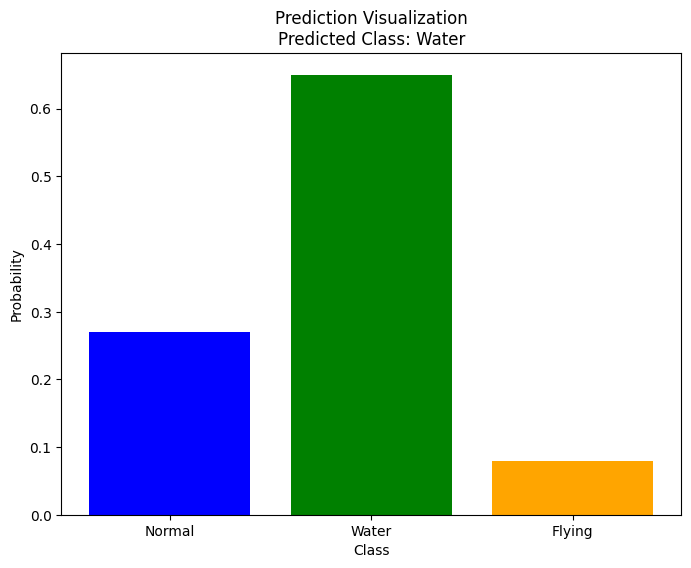

In [ ]:
import matplotlib.pyplot as plt

# Data
probability = [0.27, 0.65, 0.08]
predicted_class = 'Water'

# Plot
plt.figure(figsize=(8, 6))
plt.bar(['Normal', 'Water', 'Flying'], probability, color=['blue', 'green', 'orange'])
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Prediction Visualization\nPredicted Class: ' + predicted_class)
plt.show()


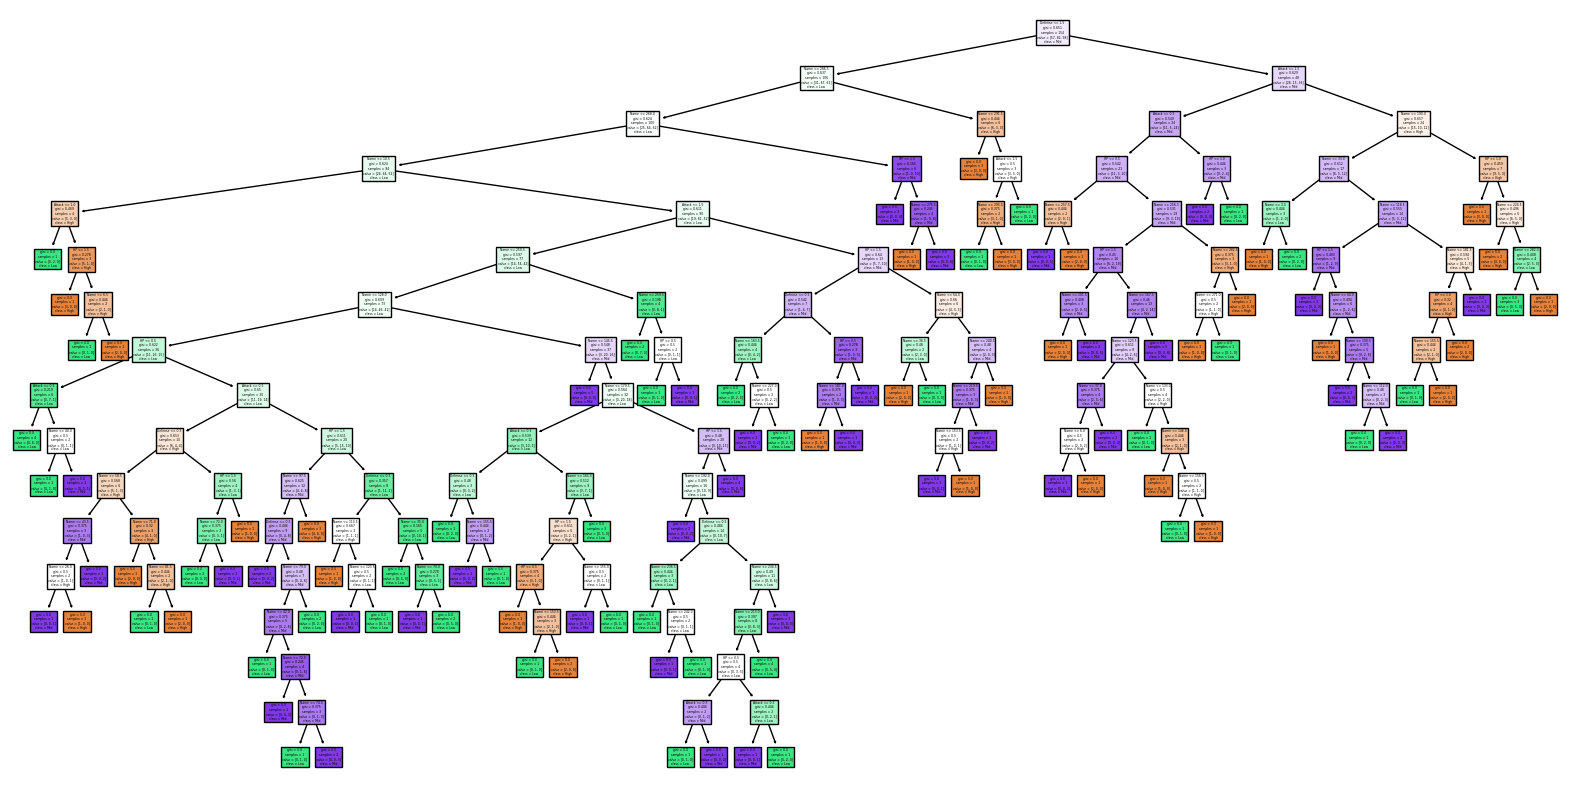

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize one of the decision trees
plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[0], feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
plt.show()


In [ ]:
## Return probability and the class
def predict(row):
  return {"score":0,"class":"TBD"}#should be replaces with "Normal", "Water", or "Flying"

In [ ]:
### Use this loop to provide
for row in test_data.iterrows():
  print(print(row[1]["Name"]), print(predict(row[1])))
  # break

Pidgeotto
{'score': 0, 'class': 'TBD'}
None None
Zubat
{'score': 0, 'class': 'TBD'}
None None
Igglybuff
{'score': 0, 'class': 'TBD'}
None None
Watchog
{'score': 0, 'class': 'TBD'}
None None
Pyroar
{'score': 0, 'class': 'TBD'}
None None
Sawsbuck
{'score': 0, 'class': 'TBD'}
None None
Suicune
{'score': 0, 'class': 'TBD'}
None None
Zangoose
{'score': 0, 'class': 'TBD'}
None None
Azumarill
{'score': 0, 'class': 'TBD'}
None None
Squirtle
{'score': 0, 'class': 'TBD'}
None None
Togetic
{'score': 0, 'class': 'TBD'}
None None
Gliscor
{'score': 0, 'class': 'TBD'}
None None
Noibat
{'score': 0, 'class': 'TBD'}
None None
Skiploom
{'score': 0, 'class': 'TBD'}
None None
Snorlax
{'score': 0, 'class': 'TBD'}
None None
Simipour
{'score': 0, 'class': 'TBD'}
None None
Chansey
{'score': 0, 'class': 'TBD'}
None None
Butterfree
{'score': 0, 'class': 'TBD'}
None None
Spearow
{'score': 0, 'class': 'TBD'}
None None
Delibird
{'score': 0, 'class': 'TBD'}
None None
Feraligatr
{'score': 0, 'class': 'TBD'}
None None

M3

In [ ]:
import pandas as pd

# URL of the CSV file
url = 'https://gist.github.com/rhema/3b4b729d98978b9020d85c9b9e7c9dd6/raw/e0831e96129b2a0af0c696efe132cb8503c1e631/NormalWaterFlyingPokemon.csv'

# Load the CSV file into a pandas DataFrame
all_data = pd.read_csv(url)

# Calculate the total number of samples
total_samples = len(all_data)

# Count the occurrences of each type
type_counts = all_data['Type'].value_counts()

# Calculate the prior probability for each type
prior_probabilities = type_counts / total_samples

print("Prior probabilities for each type:")
print(prior_probabilities)


Prior probabilities for each type:
Water     0.424242
Normal    0.340067
Flying    0.235690
Name: Type, dtype: float64


In [ ]:
import pandas as pd

# URL of the CSV file
url = 'https://gist.github.com/rhema/3b4b729d98978b9020d85c9b9e7c9dd6/raw/e0831e96129b2a0af0c696efe132cb8503c1e631/NormalWaterFlyingPokemon.csv'

# Load the CSV file into a pandas DataFrame
all_data = pd.read_csv(url)

# Calculate the total number of samples
total_samples = len(all_data)

# Group the data by Type
grouped_data = all_data.groupby('Type')

# Define the feature values for HP, Attack, and Defense
hp_values = ['Low', 'Mid', 'High']
attack_values = ['Low', 'Mid', 'High']
defense_values = ['Low', 'Mid', 'High']

# Calculate the likelihood for each feature value for HP, Attack, and Defense
for feature in ['HP', 'Attack', 'Defense']:
    print(f"For {feature}:")
    for type_name, group in grouped_data:
        print(f"  p({feature} | Type={type_name}):")
        feature_counts = group[feature].value_counts()
        for value in globals()[f'{feature.lower()}_values']:
            if value in feature_counts:
                likelihood = feature_counts[value] / len(group)
            else:
                likelihood = 0
            print(f"    p({feature}={value} | Type={type_name}): {likelihood:.4f}")
    print()


For HP:
  p(HP | Type=Flying):
    p(HP=Low | Type=Flying): 0.2000
    p(HP=Mid | Type=Flying): 0.5571
    p(HP=High | Type=Flying): 0.2429
  p(HP | Type=Normal):
    p(HP=Low | Type=Normal): 0.2772
    p(HP=Mid | Type=Normal): 0.4455
    p(HP=High | Type=Normal): 0.2772
  p(HP | Type=Water):
    p(HP=Low | Type=Water): 0.3651
    p(HP=Mid | Type=Water): 0.4365
    p(HP=High | Type=Water): 0.1984

For Attack:
  p(Attack | Type=Flying):
    p(Attack=Low | Type=Flying): 0.2857
    p(Attack=Mid | Type=Flying): 0.4286
    p(Attack=High | Type=Flying): 0.2857
  p(Attack | Type=Normal):
    p(Attack=Low | Type=Normal): 0.4158
    p(Attack=Mid | Type=Normal): 0.2376
    p(Attack=High | Type=Normal): 0.3465
  p(Attack | Type=Water):
    p(Attack=Low | Type=Water): 0.3333
    p(Attack=Mid | Type=Water): 0.2778
    p(Attack=High | Type=Water): 0.3889

For Defense:
  p(Defense | Type=Flying):
    p(Defense=Low | Type=Flying): 0.3286
    p(Defense=Mid | Type=Flying): 0.4429
    p(Defense=High | Ty

In [ ]:
# Define the features of Mandibuzz
mandibuzz_features = {'HP': 'Mid', 'Attack': 'High', 'Defense': 'Mid'}

# Initialize variables to store the prior probabilities of each type
p_type_normal = len(grouped_data.get_group('Normal')) / total_samples
p_type_water = len(grouped_data.get_group('Water')) / total_samples
p_type_flying = len(grouped_data.get_group('Flying')) / total_samples

# Initialize variables to store the likelihood of the features given each type
p_features_given_normal = 1
p_features_given_water = 1
p_features_given_flying = 1

# Calculate the likelihood of the features given each type
for feature, value in mandibuzz_features.items():
    p_feature_given_normal = grouped_data.get_group('Normal')[grouped_data.get_group('Normal')[feature] == value][feature].count() / len(grouped_data.get_group('Normal'))
    p_feature_given_water = grouped_data.get_group('Water')[grouped_data.get_group('Water')[feature] == value][feature].count() / len(grouped_data.get_group('Water'))
    p_feature_given_flying = grouped_data.get_group('Flying')[grouped_data.get_group('Flying')[feature] == value][feature].count() / len(grouped_data.get_group('Flying'))

    p_features_given_normal *= p_feature_given_normal
    p_features_given_water *= p_feature_given_water
    p_features_given_flying *= p_feature_given_flying

# Calculate the numerator of Bayes' theorem for each type
numerator_normal = p_features_given_normal * p_type_normal
numerator_water = p_features_given_water * p_type_water
numerator_flying = p_features_given_flying * p_type_flying

# Calculate the denominator of Bayes' theorem (p(Features))
p_features = numerator_normal + numerator_water + numerator_flying

# Calculate the posterior probability for each type
p_type_given_features_normal = numerator_normal / p_features
p_type_given_features_water = numerator_water / p_features
p_type_given_features_flying = numerator_flying / p_features

# Print the posterior probabilities
print("p(Type=Normal | Features) =", p_type_given_features_normal)
print("p(Type=Water | Features) =", p_type_given_features_water)
print("p(Type=Flying | Features) =", p_type_given_features_flying)


p(Type=Normal | Features) = 0.175709335048357
p(Type=Water | Features) = 0.5287184268004279
p(Type=Flying | Features) = 0.2955722381512151


In [ ]:
# Determine the type with the highest probability
predicted_type = max(p_type_given_features_normal, p_type_given_features_water, p_type_given_features_flying)

# Print the predicted type
if predicted_type == p_type_given_features_normal:
    print("The predicted Pokémon type is: Normal")
elif predicted_type == p_type_given_features_water:
    print("The predicted Pokémon type is: Water")
else:
    print("The predicted Pokémon type is: Flying")


The predicted Pokémon type is: Water
